<a href="https://colab.research.google.com/github/sanjanasreesanjana6-lgtm/data-Visualization-with-python-/blob/main/revision_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
ins_df = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
print(ins_df.head())
print(ins_df.shape)

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
(1338, 7)


In [ ]:
ins_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
ins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
print(ins_df.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [ ]:
#check the count of duplicate values if they are preent then replace them
ins_df.duplicated().sum()
ins_df.drop_duplicates(inplace=True)

In [ ]:
#convert the categorical data smoker to numerical using lable encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
ins_df.iloc[:,4]=le.fit_transform(ins_df.iloc[:,4])
ins_df['smoker']=ins_df['smoker'].replace({"yes":1,"no":0})
ins_df['sex']=ins_df['sex'].replace({"male":1,"female":0})
ins_df['region']=ins_df['region'].replace({"southwest":1,"southeast":0,"northwest":-1,"northeast":-0})
ins_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,0,1725.55230
2,28,1,33.000,3,0,0,4449.46200
3,33,1,22.705,0,0,-1,21984.47061
4,32,1,28.880,0,0,-1,3866.85520


In [ ]:
ins_df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,0.504862,30.663452,1.095737,0.204936,0.000748,13279.121487
std,14.044333,0.500163,6.100468,1.205571,0.403806,0.696978,12110.359656
min,18.000000,0.000000,15.960000,0.000000,0.000000,-1.000000,1121.873900
25%,27.000000,0.000000,26.290000,0.000000,0.000000,0.000000,4746.344000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,0.000000,9386.161300
75%,51.000000,1.000000,34.700000,2.000000,0.000000,0.000000,16657.717450
max,64.000000,1.000000,53.130000,5.000000,1.000000,1.000000,63770.428010


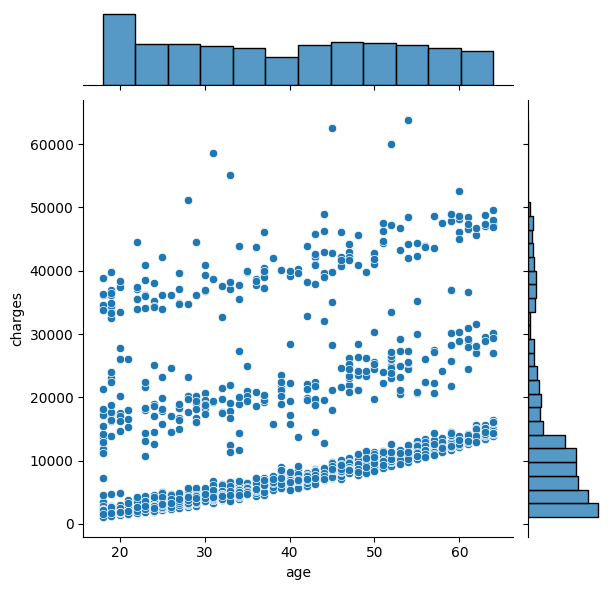

In [ ]:
#correlation between the 'charges' and 'age'
#here when age is increasing the charges also increasing
#this is a +ve correlation
import seaborn as sns
sns.jointplot(x=ins_df['age'],y=ins_df['charges'])

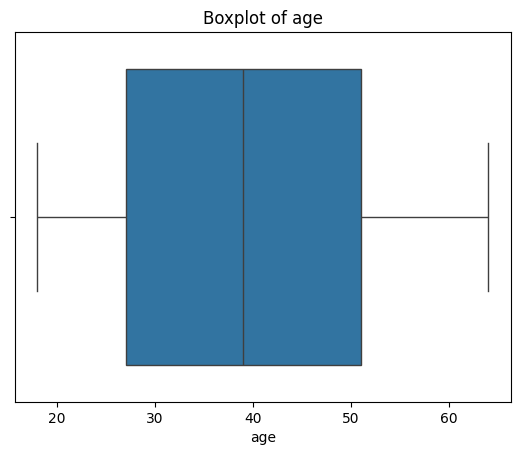

In [ ]:
#no outlier in age
import matplotlib.pyplot as plt
ax=sns.boxplot(x=ins_df['age'])
ax.set_title("Boxplot of age")
plt.show()
#outlier=mean the data which is different from the entire data is called outlier
#Boxplot is used for only one variable

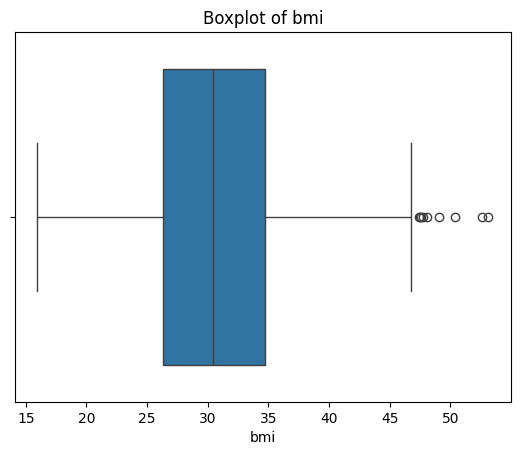

In [ ]:
import matplotlib.pyplot as plt
ax=sns.boxplot(x=ins_df['bmi'])
ax.set_title("Boxplot of bmi")
plt.show()
#the  points outside the boxplot is the outliers

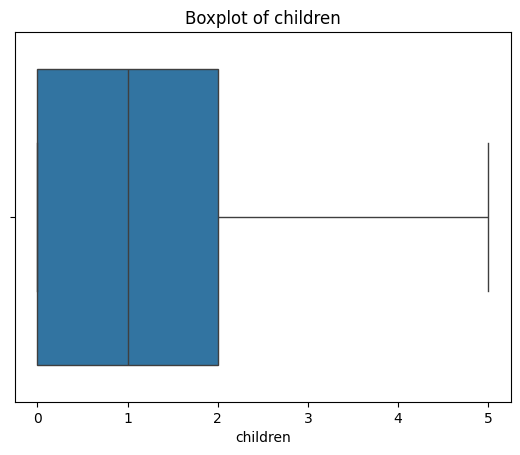

In [ ]:
ax=sns.boxplot(x=ins_df['children'])
ax.set_title("Boxplot of children")
plt.show()

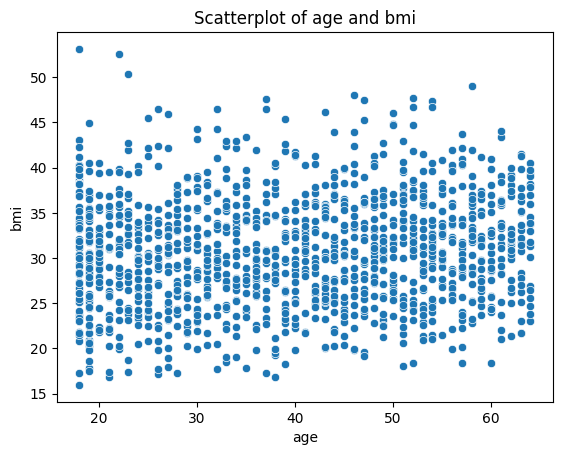

In [ ]:
ax=sns.scatterplot(x='age',y='bmi',data=ins_df)
ax.set_title("Scatterplot of age and bmi")
plt.legend
plt.show()
#in this no correlation

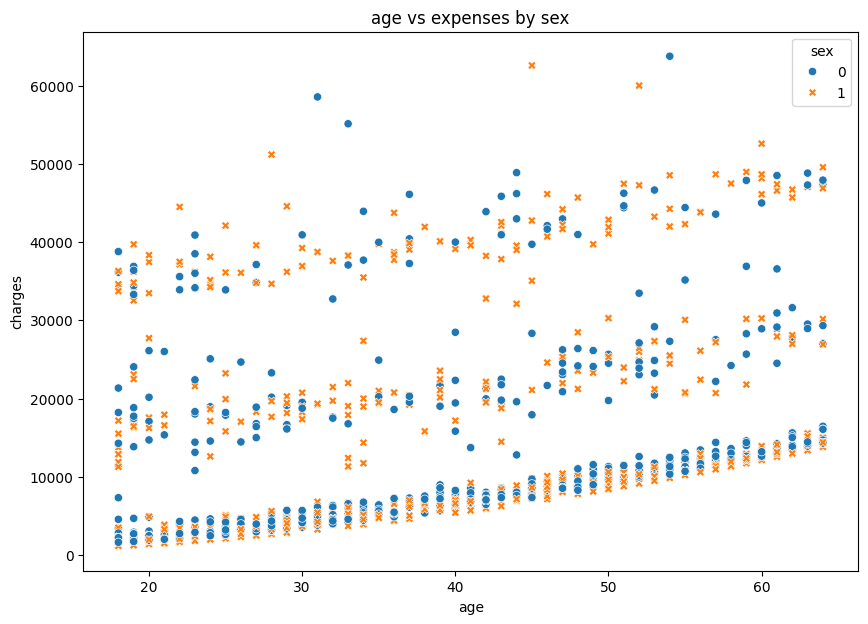

In [ ]:
#scatterplot clearly says that ,age with sex are not infucing the expenses
plt.figure(figsize=(10,7))
ax=sns.scatterplot(x='age',y='charges',hue='sex',style='sex',data=ins_df)
ax.set_title("age vs expenses by sex")
plt.legend
plt.show()

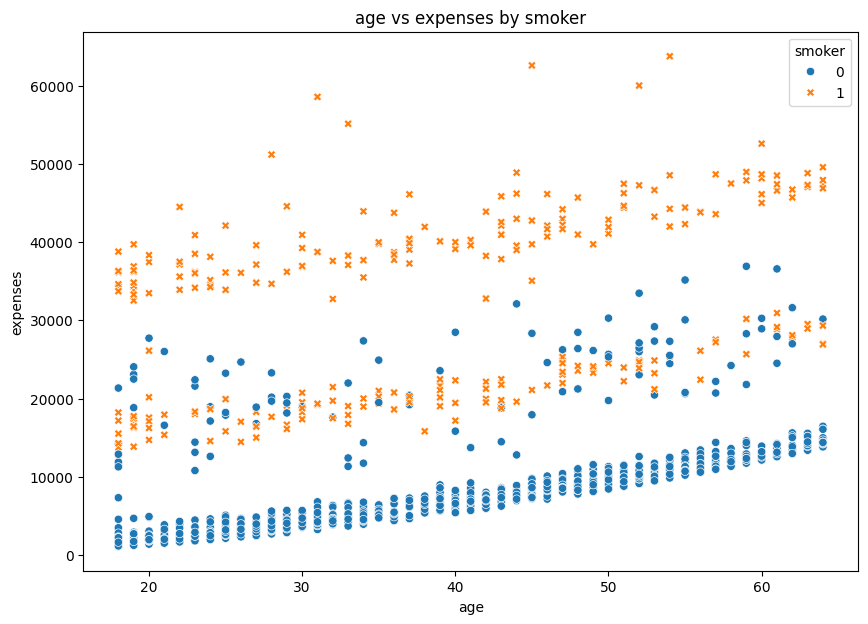

In [ ]:
#both age and smoker are highly influencing the expenses
plt.figure(figsize=(10,7))
ax=sns.scatterplot(x='age',y='charges',hue='smoker',style='smoker',data=ins_df)
plt.xlabel("age")
plt.ylabel("expenses")
ax.set_title("age vs expenses by smoker")
#plt.legend
plt.show()

In [ ]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data=pd.read_csv("/content/archive.zip")
data

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,NaN,NaN,NaN,NaN
7046,1050855161656896_1061334757275603,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,NaN,NaN,NaN,NaN
7047,1050855161656896_1060126464063099,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,NaN,NaN,NaN,NaN
7048,1050855161656896_1058663487542730,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0,NaN,NaN,NaN,NaN


In [ ]:
data.head(10)

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN
5,246675545449582_1645650162218773,photo,4/18/2018 2:14,217,6,0,211,5,1,0,0,0,NaN,NaN,NaN,NaN
6,246675545449582_1645564175560705,video,4/18/2018 0:24,503,614,72,418,70,10,2,0,3,NaN,NaN,NaN,NaN
7,246675545449582_1644824665634656,video,4/17/2018 7:42,295,453,53,260,32,1,1,0,1,NaN,NaN,NaN,NaN
8,246675545449582_1644655795651543,photo,4/17/2018 3:33,203,1,0,198,5,0,0,0,0,NaN,NaN,NaN,NaN
9,246675545449582_1638788379571618,photo,4/11/2018 4:53,170,9,1,167,3,0,0,0,0,NaN,NaN,NaN,NaN


In [ ]:
data.tail()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
7045,1050855161656896_1061863470556065,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,NaN,NaN,NaN,NaN
7046,1050855161656896_1061334757275603,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,NaN,NaN,NaN,NaN
7047,1050855161656896_1060126464063099,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,NaN,NaN,NaN,NaN
7048,1050855161656896_1058663487542730,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0,NaN,NaN,NaN,NaN
7049,1050855161656896_1050858841656528,photo,9/10/2016 10:30,17,0,0,17,0,0,0,0,0,NaN,NaN,NaN,NaN


In [ ]:
data.shape

(7050, 16)

In [ ]:
len(data)

7050

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

In [ ]:
data.isnull().sum()
#here we can observe that last four columns are null values
#if you want u can remove it also

,0
status_id,0
status_type,0
status_published,0
num_reactions,0
num_comments,0
num_shares,0
num_likes,0
num_loves,0
num_wows,0
num_hahas,0


In [ ]:
data.drop(['Column1','Column2','Column3','Column4'],axis=1,inplace=True)
#so by this we can remove/drop the null values

In [ ]:
data.info()
#so we have deleted the 4 columns then the columns reduced to 11

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_id         7050 non-null   object
 1   status_type       7050 non-null   object
 2   status_published  7050 non-null   object
 3   num_reactions     7050 non-null   int64 
 4   num_comments      7050 non-null   int64 
 5   num_shares        7050 non-null   int64 
 6   num_likes         7050 non-null   int64 
 7   num_loves         7050 non-null   int64 
 8   num_wows          7050 non-null   int64 
 9   num_hahas         7050 non-null   int64 
 10  num_sads          7050 non-null   int64 
 11  num_angrys        7050 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 661.1+ KB


In [ ]:
data.describe(include='all')

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,7050,7050,7050,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
unique,6997,4,6913,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,819700534875473_962061653972693,photo,3/20/2018 1:54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2,4288,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191
std,NaN,NaN,NaN,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812
min,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,NaN,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,NaN,NaN,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
data.describe()
#normally it will take only the numerical values if we mention all then it will take all including the categorical values

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
mean,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191
std,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000


**in k-means clustering the range of k will be in between the 2-11(not more than 11) .. this range mean we have take the k only upto the 2 to 11 not more than that**

**in this we will see how take the k values(how many k's) according to the data**



**so the data we have in that we can ony use 3 columns only because remaning are the continuous values the just depend on these 3 columns or there existence**

In [ ]:
data['status_id'].unique()

array(['246675545449582_1649696485147474',
       '246675545449582_1649426988507757',
       '246675545449582_1648730588577397', ...,
       '1050855161656896_1060126464063099',
       '1050855161656896_1058663487542730',
       '1050855161656896_1050858841656528'], dtype=object)

In [ ]:
len(data['status_id'].unique())
#so 6997 it is showing out of the 7050 records ,so we should not use the 6997 of k's

6997

In [ ]:
data['status_published'].unique()

array(['4/22/2018 6:00', '4/21/2018 22:45', '4/21/2018 6:17', ...,
       '9/21/2016 23:03', '9/20/2016 0:43', '9/10/2016 10:30'],
      dtype=object)

In [ ]:
len(data['status_published'].unique())
#so here also same thing we can't use it

6913

In [ ]:
data['status_type'].unique()

array(['video', 'photo', 'link', 'status'], dtype=object)

In [ ]:
len(data['status_type'].unique())
#so this we can use bzc it in the range to use (2-11)

4

**this is one type to find the k value so here i can use the 4 data points(mean i can able to group the data to 4 parts)**

In [ ]:
#if u dont want that both values u can drop them
data.drop(['status_id','status_published'],axis=1,inplace=True)

In [ ]:
#after droping the data it just looks like
data.head(10)

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0
5,photo,217,6,0,211,5,1,0,0,0
6,video,503,614,72,418,70,10,2,0,3
7,video,295,453,53,260,32,1,1,0,1
8,photo,203,1,0,198,5,0,0,0,0
9,photo,170,9,1,167,3,0,0,0,0


In [ ]:
data.info()
#so in this we can observe that only one column is of the catagorical ,so we will convert it to the numerical for the better understanding
#for converting we use the label en encoder

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   status_type    7050 non-null   object
 1   num_reactions  7050 non-null   int64 
 2   num_comments   7050 non-null   int64 
 3   num_shares     7050 non-null   int64 
 4   num_likes      7050 non-null   int64 
 5   num_loves      7050 non-null   int64 
 6   num_wows       7050 non-null   int64 
 7   num_hahas      7050 non-null   int64 
 8   num_sads       7050 non-null   int64 
 9   num_angrys     7050 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 550.9+ KB


**label encoder**....label encoder is used to convert the categorical data into a numerical data

In [ ]:
x=data
y=data['status_type']

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
x['status_type']=le.fit_transform(x['status_type'])
y=le.fit_transform(y)

In [ ]:
data.head()
#so we have converted the status_type to the numbers

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3,529,512,262,432,92,3,1,1,0
1,1,150,0,0,150,0,0,0,0,0
2,3,227,236,57,204,21,1,1,0,0
3,1,111,0,0,111,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0


In [ ]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=4)
kmeans.fit(x)

KMeans(n_clusters=4)

In [ ]:
kmeans.cluster_centers_

array([[1.82231405e+00, 1.71047107e+03, 3.14260331e+02, 1.16766529e+02,
        1.65024587e+03, 4.71528926e+01, 9.72520661e+00, 2.58057851e+00,
        4.13223140e-01, 3.53305785e-01],
       [1.66385636e+00, 1.12211553e+02, 1.00278845e+02, 2.34902420e+01,
        1.02900234e+02, 8.08649493e+00, 5.70804059e-01, 3.96409055e-01,
        1.77829820e-01, 7.68149883e-02],
       [3.00000000e+00, 4.62946309e+02, 4.28673154e+03, 4.59758389e+02,
        3.54778523e+02, 9.36711409e+01, 4.51677852e+00, 6.86577181e+00,
        2.26174497e+00, 8.52348993e-01],
       [2.83333333e+00, 5.63666667e+02, 1.23832500e+04, 5.57083333e+02,
        4.49750000e+02, 9.70000000e+01, 4.50000000e+00, 8.25000000e+00,
        3.50000000e+00, 6.66666667e-01]])

In [ ]:
#check the quaity of weak classification of the model
labels=kmeans.labels_
#check how many labels are arranged correctly
correct_labels=sum(y==labels)
print("result:%d out of %d samples were correctly labeled."%(correct_labels,y.size))
print('Accuracy score: {0:0.2f}'.format(correct_labels/float(y.size)))
#here something fecious when we click on the runall (top button)on every time it is changing the accuracy score

result:4088 out of 7050 samples were correctly labeled.
Accuracy score: 0.58


**use the elbow(is also known as wcss (see in clustering colab for better understanding)) method to find the optimal no.of clusters**

**inertia**---Inertia measures how tightly the data points are clustered around their centroids. Technically, it’s the sum of squared distances between each point and its assigned cluster center.

Inertia
=
∑
𝑖
=
1
𝑛
∥
𝑥
𝑖
−
𝑐
𝑘
𝑖
∥
2

something formula is there

in simple words we can say inertia measures how well the model learned the clusters

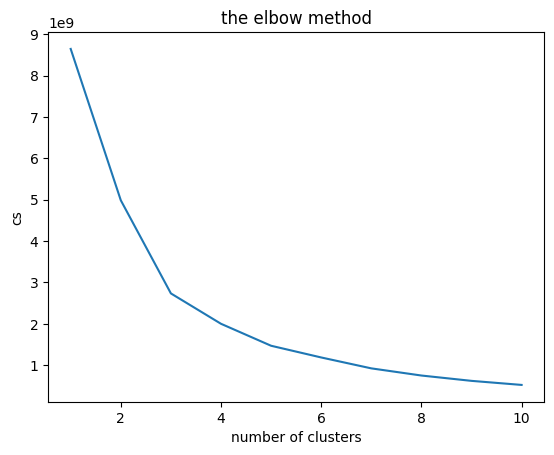

In [ ]:
from sklearn.cluster import KMeans
cs=[]
for i in range(1,11):#here we are using the forloop for the range
  kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)#the maximum iterations are 300,it can take up to the 10 cluters,the random state is zero so that no repetations will occur
  kmeans.fit(x)
  cs.append(kmeans.inertia_)
plt.plot(range(1,11),cs)
plt.title("the elbow method")
plt.xlabel("number of clusters")
plt.ylabel("cs")
plt.show()